Постановка задачи

> Цель:
Целью анализа является изучение взаимосвязей между различными признаками в наборе данных о зарплатах в области Data Science в 2023 году. Мы также стремимся подготовить данные для возможного обучения модели.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/Kirill1210/machine_learning/tree/ml/ds_salaries.csv")

In [ ]:
data_raw.shape

(3755, 11)

In [ ]:
data_raw.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
# Приводим данные в категориальный тип
data_raw["experience_level"] = data_raw["experience_level"].astype("category")
data_raw["employment_type"] = data_raw["employment_type"].astype("category")


# Приводим Yes/No данные в бинарный (целочисленный) тип
data_raw["remote_ratio"] = data_raw["remote_ratio"].astype("int64")

level_mapping = {'SE': 1, 'MI': 2, 'EN': 3, 'EX': 4}
data_raw['experience_level'] = data_raw['experience_level'].map(level_mapping)

type_mapping = {'FT': 1, 'PT': 2, 'CT': 3, 'FL': 4}
data_raw['employment_type'] = data_raw['employment_type'].map(type_mapping)

type_mapping = {'M': 1, 'L': 2, 'S': 3}
data_raw['company_size'] = data_raw['company_size'].map(type_mapping)

data_raw['job_title'] = pd.factorize(data_raw['job_title'])[0]

columns_to_drop = ['company_location', 'employee_residence', "salary_currency"]
data_raw = data_raw.drop(columns=columns_to_drop)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         3755 non-null   int64   
 1   experience_level  3755 non-null   category
 2   employment_type   3755 non-null   category
 3   job_title         3755 non-null   int64   
 4   salary            3755 non-null   int64   
 5   salary_in_usd     3755 non-null   int64   
 6   remote_ratio      3755 non-null   int64   
 7   company_size      3755 non-null   int64   
dtypes: category(2), int64(6)
memory usage: 183.9 KB


In [ ]:
data_raw.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,remote_ratio,company_size
0,2023,1,1,0,80000,85847,100,2
1,2023,2,3,1,30000,30000,100,3
2,2023,2,3,1,25500,25500,100,3
3,2023,1,1,2,175000,175000,100,1
4,2023,1,1,2,120000,120000,100,1


In [ ]:
data_raw.describe(include=['category'])
corrMat = data_raw.corr(numeric_only=True)

corrMat

,work_year,job_title,salary,salary_in_usd,remote_ratio,company_size
work_year,1.000000,-0.156954,-0.094724,0.228290,-0.236430,-0.419650
job_title,-0.156954,1.000000,0.041307,-0.067952,0.064941,0.212622
salary,-0.094724,0.041307,1.000000,-0.023676,0.028731,0.113226
salary_in_usd,0.228290,-0.067952,-0.023676,1.000000,-0.064171,-0.227517
remote_ratio,-0.236430,0.064941,0.028731,-0.064171,1.000000,0.159289
company_size,-0.419650,0.212622,0.113226,-0.227517,0.159289,1.000000


1. work_year и job_title (-0.156954): Слабая отрицательная корреляция между годом работы и должностью. Это может указывать на то, что некоторые должности более популярны или востребованы в определенные годы.

2. work_year и salary (-0.094724): Слабая отрицательная корреляция между годом работы и зарплатой. Это может указывать на то, что с течением времени зарплаты могут немного снижаться.

3. work_year и salary_in_usd (0.228290): Слабая положительная корреляция между годом работы и зарплатой в USD. Это может указывать на то, что зарплаты в USD немного возрастают с течением времени.

4. work_year и remote_ratio (-0.236430): Слабая отрицательная корреляция между годом работы и удаленной работой. Это может означать, что с течением времени уровень удаленной работы может немного снижаться.

5. work_year и company_size (-0.419650): Умеренная отрицательная корреляция между годом работы и размером компании. Это может указывать на то, что с течением времени сотрудники предпочитают работу в более крупных компаниях.

6. job_title и salary (0.041307): Очень слабая положительная корреляция между должностью и зарплатой. Это может означать, что некоторые должности связаны с более высокими зарплатами, но влияние несущественно.

7. job_title и salary_in_usd (-0.067952): Очень слабая отрицательная корреляция между должностью и зарплатой в USD. Аналогично, влияние несущественно.

8. job_title и remote_ratio (0.064941): Очень слабая положительная корреляция между должностью и удаленной работой. Влияние также несущественно.

9. job_title и company_size (0.212622): Умеренная положительная корреляция между должностью и размером компании. Это может означать, что некоторые должности более распространены в крупных компаниях.

10. salary и salary_in_usd (-0.023676): Очень слабая отрицательная корреляция между зарплатой и зарплатой в USD. Это может свидетельствовать о том, что часть зарплаты выплачивается в других валютах.

11. salary и remote_ratio (0.028731): Очень слабая положительная корреляция между зарплатой и удаленной работой.

12. salary и company_size (0.113226): Умеренная положительная корреляция между зарплатой и размером компании.

13. salary_in_usd и remote_ratio (-0.064171): Очень слабая отрицательная корреляция между зарплатой в USD и удаленной работой.

14. salary_in_usd и company_size (-0.227517): Умеренная отрицательная корреляция между зарплатой в USD и размером компании.

15. remote_ratio и company_size (0.159289): Умеренная положительная корреляция между удаленной работой и размером компании.


<Axes: >

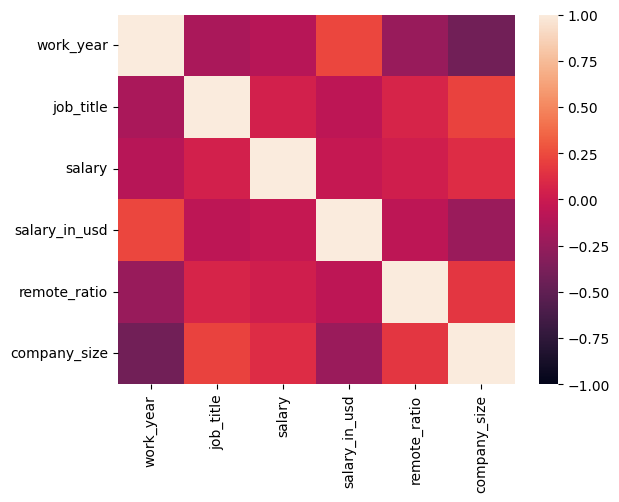

In [ ]:
import seaborn

seaborn.heatmap(corrMat,
                vmin=-1.0,
                vmax=1.0)

0.8396804260985353
0.12090545938748336
0.03941411451398136


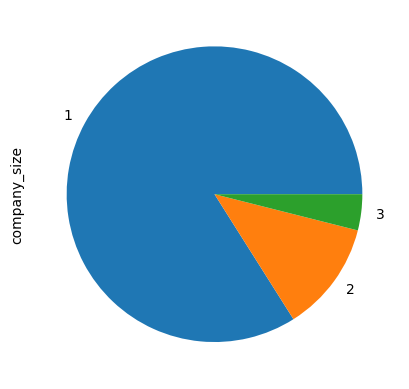

In [ ]:
import collections

print(collections.Counter(data_raw["company_size"])[1]/data_raw.shape[0])
print(collections.Counter(data_raw["company_size"])[2]/data_raw.shape[0])
print(collections.Counter(data_raw["company_size"])[3]/data_raw.shape[0])

data_raw["company_size"].value_counts().plot.pie();

In [ ]:
from sklearn.preprocessing import StandardScaler

# Выбор числовых признаков
numerical_features = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio', 'company_size']

# Создание объекта стандартизатора
scaler = StandardScaler()

# Применение стандартизации к числовым признакам
data_raw[numerical_features] = scaler.fit_transform(data_raw[numerical_features])

# Вывод обновленного датасета
data_raw.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,remote_ratio,company_size
0,0.905994,1,1,0,-0.164827,-0.820391,1.105918,1.638088
1,0.905994,2,3,1,-0.239277,-1.706187,1.105918,3.685016
2,0.905994,2,3,1,-0.245978,-1.777563,1.105918,3.685016
3,0.905994,1,1,2,-0.023371,0.593676,1.105918,-0.408840
4,0.905994,1,1,2,-0.105266,-0.278686,1.105918,-0.408840


In [ ]:
from sklearn.model_selection import train_test_split

# Предполагая, что 'TravelInsurance' является вашей целевой переменной
X_train, X_test, Y_train, Y_test = train_test_split(data_raw.drop("experience_level", axis=1),
                                                    data_raw["experience_level"],
                                                    test_size=0.2,
                                                    random_state=42)

print("X train:", X_train.shape, "test:", X_test.shape)
print("Y train:", len(Y_train), "test:", len(Y_test))

X train: (3004, 7) test: (751, 7)
Y train: 3004 test: 751


In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier

error_list = list()

# Проходимся по 1-30 соседям
for k in range(1, 31):
    kNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
    X_tr_pred = kNN.predict(X_train)
    X_te_pred = kNN.predict(X_test)
    trError   = np.mean(Y_train != X_tr_pred)
    testError = np.mean(Y_test  != X_te_pred)
    error_list.append(testError)
    print("k = ", k, ", error on train =", trError)
    print("k = ", k, ", error on test  =", testError)
    print("/********************************************/")

k =  1 , error on train = 0.06524633821571238
k =  1 , error on test  = 0.3195739014647137
/********************************************/
k =  2 , error on train = 0.16011984021304926
k =  2 , error on test  = 0.2996005326231691
/********************************************/
k =  3 , error on train = 0.17410119840213048
k =  3 , error on test  = 0.3169107856191744
/********************************************/
k =  4 , error on train = 0.20639147802929428
k =  4 , error on test  = 0.303595206391478
/********************************************/
k =  5 , error on train = 0.2173768308921438
k =  5 , error on test  = 0.3169107856191744
/********************************************/
k =  6 , error on train = 0.23768308921438083
k =  6 , error on test  = 0.31025299600532624
/********************************************/
k =  7 , error on train = 0.23868175765645805
k =  7 , error on test  = 0.322237017310253
/********************************************/
k =  8 , error on train = 0.25432756

In [ ]:
print("Наилучшая точность на тестовой выборке:", 1 - min(error_list))
print("При k =", error_list.index(min(error_list)) + 1)

Наилучшая точность на тестовой выборке: 0.7003994673768309
При k = 2


In [ ]:
%%time
from sklearn.svm import SVC

SVC = SVC(decision_function_shape='ovo').fit(X_train, Y_train)
X_tr_pred = SVC.predict(X_train)
X_te_pred = SVC.predict(X_test)
trError   = np.mean(Y_train != X_tr_pred)
testError = np.mean(Y_test != X_te_pred)

print("Показатель точности на тренировочной выборке:", 1 - trError)
print("Показатель точности на тестовой выборке:", 1 - testError)

Показатель точности на тренировочной выборке: 0.6731025299600533
Показатель точности на тестовой выборке: 0.6711051930758988
CPU times: user 711 ms, sys: 5.28 ms, total: 716 ms
Wall time: 718 ms


> Выводы:

Модель K-Nearest Neighbors (KNN):
Наилучшая точность:

1. Наилучшая точность на тестовой выборке достигается при k=2 и составляет примерно 70.04%.

2. Ошибка на обучающей выборке увеличивается с увеличением числа соседей (k).
Ошибка на тестовой выборке имеет минимум при k=2, после чего начинает постепенно увеличиваться.

3. Время выполнения алгоритма KNN на данном объеме данных составляет около 9 секунд.
Модель Support Vector Machines (SVM):

4. Показатель точности на тестовой выборке для модели SVM составляет примерно 67.11%.
Сравнение с KNN:

5. В данном случае, модель KNN показывает более высокую точность на тестовой выборке по сравнению с моделью SVM.




# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_model.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6671105193075899

# Случайный лес

In [ ]:
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier(n_estimators = 4)
rf_model.fit(X_train, Y_train)
rf_model.score(X_test, Y_test)

0.7097203728362184

# Нейросеть

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (20,20),
                          solver = 'lbfgs',
                          activation = 'logistic',
                          random_state = 42)
mlp_model.fit(X_train, Y_train)
mlp_model.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6750998668442078

# Подберем параметры для случайного леса так как он показал наибольшую точность из 3 алгоритмов

16
0.7270306258322237


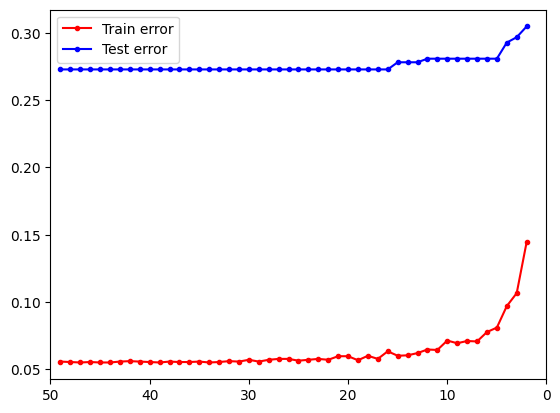

In [ ]:
kn = range(2, 50)
err = 1
best_n = 2
err_test=[]
err_train=[]
for n in kn:
    model = ensemble.RandomForestClassifier(n_estimators = n)
    model.fit(X_train, Y_train)
    res = 1-model.score(X_test, Y_test)
    if err > res:
      err = res
      best_n = n
    err_test.append(err)
    err_train.append(1-model.score(X_train, Y_train))
plt.plot(kn, err_train, '.-r', label = 'Train error')
plt.plot(kn, err_test,  '.-b', label = 'Test error')
plt.legend(loc = 0)
plt.xlim([50, 0])
print(best_n)
print(1-err)

## Наблюдается переобучение, лучшая точность 0.727 при параметре n_estimators=16, что точнее, чем у рассмотренного ранее алгоритма соседей

## Confusion matrix

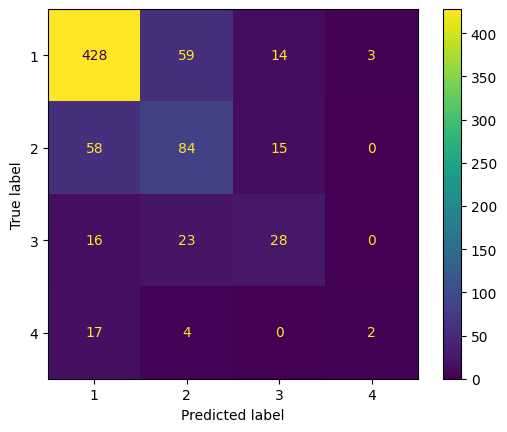

In [ ]:
rf_model = ensemble.RandomForestClassifier(n_estimators = 16)
rf_model.fit(X_train, Y_train)
Y_predict_test = rf_model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4])
disp.plot()
plt.show()
pass

## В тестовой выборке в основном представлен 1 класс. При этом чаще всего возникает путаница между 1 и 2 классом. Чаще встречаются ошибки, когда модель предсказывает класс, меньший по порядку, чем истинный. В основном это обусловлено тем, что классов 1 и 2 гораздо больше, чем 3 и 4